In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.metrics import mean_absolute_error

%matplotlib inline
import statsmodels.api as sm

### Data Cleaning Approach

- Data type format
- Columns Name Renaming
- Removing Irrelavant columns
- Determining and Creating target column for emmisions
- Data mapping to numbers for Machine Learning

In [22]:
#Helper method to properly parse the values in each column
def make_float(text):
    return float(text.replace('-', '0').replace('.', '').replace(',', '.').strip('" '))

##### Data type format

In [23]:
data = pd.read_csv("LAEI2013_MajorRoads_EmissionsbyLink_2013_LTS_Rds.csv", sep=';', decimal=",",
                    converters={
                        'Artic6Axle' : make_float,
                        'Coach' : make_float,
                        'LtBus' : make_float,
                        'DieselLgv' : make_float,
                        'PetrolLgv' : make_float,
                        'DieselCar' : make_float,
                        'PetrolCar' : make_float,
                        'Artic5Axle' : make_float,
                        'Artic3Axle' : make_float,
                        'Rigid4Axle' : make_float,
                        'Rigid3Axle' : make_float,
                        'Rigid2Axle' : make_float,
                        'Artic' : make_float,
                        'Rigid' : make_float,
                        'BusAndCoach' : make_float,
                        'Car' : make_float,
                        'Lgv' : make_float,
                        'Taxi' : make_float,
                        'Motorcycle' : make_float,
                        'ElectricCar' : make_float,
                        'ElectricLgv' : make_float,
                    })
print(data.shape)
data.head()

(366220, 32)


,GridId,Toid,GRID_ExactCut_ID,Location_ExactCut,BoroughName_ExactCut,Lts,Length (m),Emissions,Year,Pollutant,...,Artic5Axle,Artic6Axle,PetrolCar,DieselCar,PetrolLgv,DieselLgv,LtBus,Coach,ElectricCar,ElectricLgv
0,6253,4000000027908919,24,External,NonGLA,18898,50.8,DFT,2013,CO2,...,0.241,0.191,8.761,4.811,0.038,1.735,0.0,0.0,0.0,0.0
1,6253,4000000027947931,24,External,NonGLA,18895,28.6,DFT,2013,CO2,...,0.000,0.000,0.016,0.009,0.000,0.000,0.0,0.0,0.0,0.0
2,6253,4000000028013383,24,External,NonGLA,15816,5.1,DFT,2013,CO2,...,0.027,0.022,0.939,0.519,0.004,0.184,0.0,0.0,0.0,0.0
3,6253,4000000028025820,24,External,NonGLA,15816,3.8,DFT,2013,CO2,...,0.020,0.016,0.692,0.382,0.003,0.136,0.0,0.0,0.0,0.0
4,6253,4000000028029388,24,External,NonGLA,15816,1.6,DFT,2013,CO2,...,0.009,0.007,0.299,0.165,0.001,0.059,0.0,0.0,0.0,0.0


##### Column names cleaning

In [24]:
data.rename(columns={
    "Length (m)": 'Length',
    "Lts": "Road Traffic Stress",
    "BoroughName_ExactCut": "Borough Name"
}, inplace=True)


In [25]:
data.describe(include='all')

,GridId,Toid,GRID_ExactCut_ID,Location_ExactCut,Borough Name,Road Traffic Stress,Length,Emissions,Year,Pollutant,...,Artic5Axle,Artic6Axle,PetrolCar,DieselCar,PetrolLgv,DieselLgv,LtBus,Coach,ElectricCar,ElectricLgv
count,366220.000000,3.662200e+05,366220.000000,366220,366220,366220.000000,366220.000000,366220,366220.0,366220,...,366220.000000,366220.000000,366220.000000,366220.000000,366220.000000,366220.000000,366220.000000,366220.000000,366220.0,366220.0
unique,NaN,NaN,NaN,4,34,NaN,NaN,2,NaN,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Outer,NonGLA,NaN,NaN,COPERT,NaN,CO2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,195620,65380,NaN,NaN,329598,NaN,36622,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10015.480667,4.000000e+15,1820.920075,NaN,NaN,9983.574682,64.030886,NaN,2013.0,NaN,...,0.068965,0.041184,1.654557,0.889033,0.007509,0.341668,0.383019,0.096490,0.0,0.0
std,1790.892387,4.205791e+05,942.371458,NaN,NaN,5076.029862,82.558449,NaN,0.0,NaN,...,0.503252,0.312234,10.401979,5.504355,0.047372,2.147972,3.087232,1.779888,0.0,0.0
min,5918.000000,4.000000e+15,7.000000,NaN,NaN,18.000000,0.000000,NaN,2013.0,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,8676.000000,4.000000e+15,1007.000000,NaN,NaN,5786.000000,12.800000,NaN,2013.0,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,9871.000000,4.000000e+15,1814.000000,NaN,NaN,10494.000000,38.800000,NaN,2013.0,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,11277.000000,4.000000e+15,2688.000000,NaN,NaN,14256.000000,82.900000,NaN,2013.0,NaN,...,0.000000,0.000000,0.002000,0.002000,0.000000,0.001000,0.000000,0.000000,0.0,0.0


In [26]:
#Check if there are any empty/missing values
data.isnull().sum().sort_values(ascending=True)

GridId                 0
Coach                  0
LtBus                  0
DieselLgv              0
PetrolLgv              0
DieselCar              0
PetrolCar              0
Artic6Axle             0
Artic5Axle             0
Artic3Axle             0
Rigid4Axle             0
Rigid3Axle             0
Rigid2Axle             0
Artic                  0
Rigid                  0
Lgv                    0
BusAndCoach            0
Car                    0
Taxi                   0
Motorcycle             0
Emissions Unit         0
Pollutant              0
Year                   0
Emissions              0
Length                 0
Road Traffic Stress    0
Borough Name           0
Location_ExactCut      0
GRID_ExactCut_ID       0
Toid                   0
ElectricCar            0
ElectricLgv            0
dtype: int64

##### Remove irrelevant columns

- GridId is unique for each row
- Location_ExactCut is unique for each row
- Emissions Unit is constant
- Toid is unique for each row
- Year is constant
- GRID_ExactCut_ID
- Emissions is almost constant (2 variables)
- ElectricCar is a constant 0
- ElectricLgv is a a constant 0

In [27]:
#Remove irrelevant columns
del data['GridId']
del data['Location_ExactCut']
del data['Emissions Unit']
del data['Toid']
del data['Year']
del data['GRID_ExactCut_ID']
del data['Emissions']
del data['ElectricCar']
del data['ElectricLgv']
data.head()

,Borough Name,Road Traffic Stress,Length,Pollutant,Motorcycle,Taxi,Car,BusAndCoach,Lgv,Rigid,...,Rigid4Axle,Artic3Axle,Artic5Axle,Artic6Axle,PetrolCar,DieselCar,PetrolLgv,DieselLgv,LtBus,Coach
0,NonGLA,18898,50.8,CO2,0.158,0.375,13.572,0.0,1.773,1.539,...,0.315,0.177,0.241,0.191,8.761,4.811,0.038,1.735,0.0,0.0
1,NonGLA,18895,28.6,CO2,0.000,0.000,0.024,0.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.016,0.009,0.000,0.000,0.0,0.0
2,NonGLA,15816,5.1,CO2,0.017,0.040,1.458,0.0,0.188,0.169,...,0.035,0.020,0.027,0.022,0.939,0.519,0.004,0.184,0.0,0.0
3,NonGLA,15816,3.8,CO2,0.013,0.029,1.074,0.0,0.139,0.125,...,0.026,0.015,0.020,0.016,0.692,0.382,0.003,0.136,0.0,0.0
4,NonGLA,15816,1.6,CO2,0.005,0.013,0.464,0.0,0.060,0.054,...,0.011,0.006,0.009,0.007,0.299,0.165,0.001,0.059,0.0,0.0


### Computing note

- Motocycle = motocycle
- Taxi = Taxi
- Car = PetrolCar + DieselCar + ElectricCar
- BusAndCoach = LtBus + Coach
- Lgv = PetrolLgv + DieselLgv + ElectricLgv
- Rigid = Ridid2Axle + Rigid3Axle + Rigid4Axle
- Artic = Artic3Axle + Artic5Axle + Artic6Axle


We can safely drop sub-computed columns

In [28]:
#Heavy Goods Vehicle
data['Hgv'] = data['Artic']+data['Rigid']
#Create a column with the sum of all emissions
data['TotalEmissions'] = data['Motorcycle']+data['Taxi']+data['Car']+data['BusAndCoach']+data['Lgv']+data['Hgv']
del data['Artic']
del data['Rigid']
del data['Artic3Axle']
del data['Artic5Axle']
del data['Artic6Axle']
del data['Rigid2Axle']
del data['Rigid3Axle']
del data['Rigid4Axle']
del data['PetrolCar']
del data['PetrolLgv']
del data['DieselCar']
del data['DieselLgv']
del data['LtBus']
del data['Coach']

data.head()

,Borough Name,Road Traffic Stress,Length,Pollutant,Motorcycle,Taxi,Car,BusAndCoach,Lgv,Hgv,TotalEmissions
0,NonGLA,18898,50.8,CO2,0.158,0.375,13.572,0.0,1.773,2.148,18.026
1,NonGLA,18895,28.6,CO2,0.000,0.000,0.024,0.0,0.000,0.000,0.024
2,NonGLA,15816,5.1,CO2,0.017,0.040,1.458,0.0,0.188,0.238,1.941
3,NonGLA,15816,3.8,CO2,0.013,0.029,1.074,0.0,0.139,0.176,1.431
4,NonGLA,15816,1.6,CO2,0.005,0.013,0.464,0.0,0.060,0.076,0.618


In [30]:
#Following columns are no longer needed
del data['Motorcycle']
del data['Taxi']
del data['Car']
del data['BusAndCoach']
del data['Lgv']
del data['Hgv']
data.head()

,Borough Name,Road Traffic Stress,Length,Pollutant,TotalEmissions
0,NonGLA,18898,50.8,CO2,18.026
1,NonGLA,18895,28.6,CO2,0.024
2,NonGLA,15816,5.1,CO2,1.941
3,NonGLA,15816,3.8,CO2,1.431
4,NonGLA,15816,1.6,CO2,0.618


In [31]:
#Aggregate data by borough and pollutant
grouped_by = data.groupby(['Borough Name', 'Pollutant'])['TotalEmissions'].agg('sum')
grouped_by.unstack()

Pollutant,CO2,NOx,PM10_Brake,PM10_Exhaust,PM10_Resusp,PM10_Tyre,PM25_Brake,PM25_Exhaust,PM25_Resusp,PM25_Tyre
Borough Name,,,,,,,,,,
Barking and Dagenham,17863.894,69.021,4.107,0.873,3.139,0.662,1.539,0.822,0.027,0.432
Barnet,51820.786,188.588,11.935,2.325,7.661,1.981,4.465,2.165,0.059,1.285
Bexley,28277.950,104.125,6.522,1.385,4.478,1.099,2.439,1.279,0.025,0.715
Brent,49577.515,176.248,10.758,2.295,7.945,1.761,3.966,2.166,0.090,1.118
Bromley,56506.094,191.871,13.685,2.851,8.019,2.474,5.122,2.668,0.063,1.639
Camden,50839.221,174.764,10.074,2.788,6.496,1.686,3.732,2.636,0.059,1.077
City,12310.429,63.583,1.657,0.739,1.974,0.170,0.564,0.693,0.029,0.084
City of Westminster,59037.680,205.892,10.979,3.881,6.384,1.724,4.000,3.644,0.045,1.072
Croydon,58511.355,205.861,13.271,2.865,8.773,2.293,5.033,2.705,0.097,1.527


##### Variables

* Input Variables: Borough, Pollutant, Road Length, Road Traffic Stress --> Features
* Output Variables: Total Emissions

##### ML Approach

- We picked OLS because we want a simple technique to model a linear relationship between our input variables and a continuous numerical output variable.


- We picked Gradient Boosting Regression (ensemble technique) because we want to handle multicollinearity and non-linear relationships. Multicollinearity is when several independent variables in a model are correlated and thus produce less reliable statistical inferences.



- We picked SVM to capture more complex relationships between our datapoints without having to perform difficult transformations on our own. (Downside: training time is longer and is much more computationally intensive)

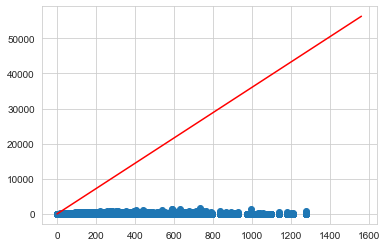

In [32]:
# plotting the original values
x = data["Length"]
y = data["TotalEmissions"]
pl.scatter(x, y)

max_x = data["TotalEmissions"].max()
min_x = data["TotalEmissions"].min()

# range of values for plotting
# the regression line
x = np.arange(min_x, max_x, 1)

# the substituted equation
y =  36.0594 * x + 0.0513

# plotting the regression line
pl.plot(y, 'r')
pl.show()

In [33]:
#Convert Categorical variables to dummy variables
data = pd.get_dummies(data, columns=['Pollutant', 'Borough Name'], drop_first=True)
data.head()

,Road Traffic Stress,Length,TotalEmissions,Pollutant_NOx,Pollutant_PM10_Brake,Pollutant_PM10_Exhaust,Pollutant_PM10_Resusp,Pollutant_PM10_Tyre,Pollutant_PM25_Brake,Pollutant_PM25_Exhaust,...,Borough Name_Merton,Borough Name_Newham,Borough Name_NonGLA,Borough Name_Redbridge,Borough Name_Richmond,Borough Name_Southwark,Borough Name_Sutton,Borough Name_Tower Hamlets,Borough Name_Waltham Forest,Borough Name_Wandsworth
0,18898,50.8,18.026,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,18895,28.6,0.024,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,15816,5.1,1.941,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,15816,3.8,1.431,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,15816,1.6,0.618,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [34]:
#Features
X = data.loc[:, data.columns != 'TotalEmissions']
#target
y = data["TotalEmissions"]

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting OLS model
model = sm.OLS(y,X_1).fit()

print(model.summary())
#How to interpret the summary: https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/

                            OLS Regression Results                            
Dep. Variable:         TotalEmissions   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     3283.
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:20:44   Log-Likelihood:            -1.6247e+06
No. Observations:              366220   AIC:                         3.250e+06
Df Residuals:                  366175   BIC:                         3.250e+06
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [35]:
yp = model.predict(X_1)
mae = mean_absolute_error(y, yp)
print("OLS Mean Absolute Error",mae)

OLS Mean Absolute Error 6.131127331497946


##### Import required libraries

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [37]:
## Change the test size only when running (takes signicant time)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.7)

# train 0.3
# test 0.3

### SVM Algorithm

In [38]:
from sklearn import svm


In [39]:
pipeline_svr = Pipeline([
    ("scale", StandardScaler()),
    ("model", svm.SVR())
])

model_svr = GridSearchCV(estimator=pipeline_svr,
                     param_grid={'model__degree': [1, 2, 3, 4, 5, 6, 7]},
                     cv=3)


In [40]:


model_svr.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', SVR())]),
             param_grid={'model__degree': [1, 2, 3, 4, 5, 6, 7]})

In [51]:
### Check Support Vector Regression Score
model_svr.score(X_test.head(100),y_test.head(100))


0.28349552364624075

SVM Mean Absolute Error 2.982099213462752


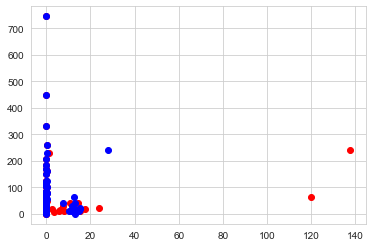

In [64]:
# compare values

pl.scatter(y_test.head(100), X_test["Length"].head(100), color="red")
yp = model_svr.predict(X_test.head(100))
mae = mean_absolute_error(y_test.head(100), yp)
pl.scatter(yp, X_test.head(100)["Length"], color="blue")
print("SVM Mean Absolute Error",mae)



### Gradient Boosting Regression

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
pipeline_gbr = Pipeline([
    ("scale", StandardScaler()),
    ("model", GradientBoostingRegressor())
])

model_gbr = GridSearchCV(estimator=pipeline_gbr,
                         param_grid={'model__n_estimators': [100, 200, 300, 400, 500, 600, 700]},
                         cv=3)


In [46]:
model_gbr.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', GradientBoostingRegressor())]),
             param_grid={'model__n_estimators': [100, 200, 300, 400, 500, 600,
                                                 700]})

In [53]:
model_gbr.score(X_test.head(100),y_test.head(100))

0.7023496404349094

GBR Mean Absolute Error 3.0272178761782778


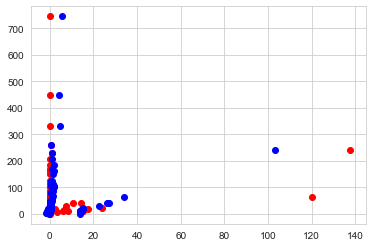

In [63]:
### Check Gradient Boosting Regression Score


pl.scatter(y_test.head(100), X_test["Length"].head(100), color="red")
yp = model_gbr.predict(X_test.head(100))
mae = mean_absolute_error(y_test.head(100), yp)
pl.scatter(yp, X_test.head(100)["Length"], color="blue")
print("GBR Mean Absolute Error",mae)